In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import gdown
import os
import zipfile


In [7]:
url = 'https://drive.google.com/drive/folders/1dXz4r1cvODUIL_9ayQUMEWpWpuZhL5yD'

In [4]:
folder_url = "https://drive.google.com/drive/folders/1dXz4r1cvODUIL_9ayQUMEWpWpuZhL5yD"
gdown.download_folder(folder_url, quiet=False)


Retrieving folder contents


Processing file 1EKnWPWOSz8L5hA9SyPtNLbZLkDJv6wgd batting_summary.csv
Processing file 1zhe-93pPrlNK64a1nXdyPeXFJ0fuux1p bowling_summary.csv
Processing file 1amwqVuba024eH7owwlErY7JE0vaQ0Rlo ICC Cricket World Cup 2023 Analysis Report.ipynb
Processing file 1YcllwOnewdfRIYpA4d12k2f21b-aBGMT match_schedule_results.csv
Processing file 1G0ziXIdxCPyJLgNI98Ab4QyM435m_kZM world_cup_players_info.csv


Retrieving folder contents completed
Building directory structure
Building directory structure completed
Downloading...
From: https://drive.google.com/uc?id=1EKnWPWOSz8L5hA9SyPtNLbZLkDJv6wgd
To: /content/Project 5: ICC Cricket World Cup 2023 Analysis/batting_summary.csv
100%|██████████| 87.9k/87.9k [00:00<00:00, 44.3MB/s]
Downloading...
From: https://drive.google.com/uc?id=1zhe-93pPrlNK64a1nXdyPeXFJ0fuux1p
To: /content/Project 5: ICC Cricket World Cup 2023 Analysis/bowling_summary.csv
100%|██████████| 39.3k/39.3k [00:00<00:00, 52.4MB/s]
Downloading...
From: https://drive.google.com/uc?id=1amwqVuba024eH7owwlErY7JE0vaQ0Rlo
To: /content/Project 5: ICC Cricket World Cup 2023 Analysis/ICC Cricket World Cup 2023 Analysis Report.ipynb
100%|██████████| 1.60M/1.60M [00:00<00:00, 150MB/s]
Downloading...
From: https://drive.google.com/uc?id=1YcllwOnewdfRIYpA4d12k2f21b-aBGMT
To: /content/Project 5: ICC Cricket World Cup 2023 Analysis/match_schedule_results.csv
100%|██████████| 8.08k/8.08k [00:00<0

['/content/Project 5: ICC Cricket World Cup 2023 Analysis/batting_summary.csv',
 '/content/Project 5: ICC Cricket World Cup 2023 Analysis/bowling_summary.csv',
 '/content/Project 5: ICC Cricket World Cup 2023 Analysis/ICC Cricket World Cup 2023 Analysis Report.ipynb',
 '/content/Project 5: ICC Cricket World Cup 2023 Analysis/match_schedule_results.csv',
 '/content/Project 5: ICC Cricket World Cup 2023 Analysis/world_cup_players_info.csv']

In [5]:
os.listdir()


['.config', 'Project 5: ICC Cricket World Cup 2023 Analysis', 'sample_data']

In [8]:
os.listdir("Project 5: ICC Cricket World Cup 2023 Analysis")

['batting_summary.csv',
 'bowling_summary.csv',
 'ICC Cricket World Cup 2023 Analysis Report.ipynb',
 'world_cup_players_info.csv',
 'match_schedule_results.csv']

In [10]:
matches = pd.read_csv("Project 5: ICC Cricket World Cup 2023 Analysis/match_schedule_results.csv")
matches.head()

,Match_no,Date,Venue,Team1,Team2,Winner,Scorecard URL
0,1,October 5,Ahmedabad,England,New Zealand,New Zealand,https://www.cricketwa.com/scorecard/18020/engl...
1,2,October 6,Hyderabad,Pakistan,Netherlands,Pakistan,https://www.cricketwa.com/scorecard/18021/paki...
2,3,October 7,Dharamsala,Bangladesh,Afghanistan,Bangladesh,https://www.cricketwa.com/scorecard/23008/bang...
3,4,October 7,Delhi,South Africa,Sri Lanka,South Africa,https://www.cricketwa.com/scorecard/23009/sout...
4,5,October 8,Chennai,India,Australia,India,https://www.cricketwa.com/scorecard/23010/indi...


In [11]:
matches.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Match_no       48 non-null     int64 
 1   Date           48 non-null     object
 2   Venue          48 non-null     object
 3   Team1          48 non-null     object
 4   Team2          48 non-null     object
 5   Winner         48 non-null     object
 6   Scorecard URL  48 non-null     object
dtypes: int64(1), object(6)
memory usage: 2.8+ KB


In [12]:
matches.isnull().sum()


,0
Match_no,0
Date,0
Venue,0
Team1,0
Team2,0
Winner,0
Scorecard URL,0


In [13]:
matches = matches.drop_duplicates()


In [19]:
matches = matches.dropna(subset=[
    'Team1',
    'Team2',
    'Winner',
    'Venue'
])

In [17]:
matches.shape


(48, 7)

# Analysis

In [20]:
wins = matches['Winner'].value_counts()
wins

,count
Winner,
Australia,9
India,9
South Africa,7
New Zealand,5
Pakistan,4
Afghanistan,4
Sri Lanka,3
England,3
Bangladesh,2


In [25]:
matches['Team1'] = matches['Team1'].str.strip()
matches['Team2'] = matches['Team2'].str.strip()
matches_played = matches['Team1'].value_counts().add(matches['Team2'].value_counts(), fill_value=0)
matches_played

,count
Afghanistan,9.0
Australia,11.0
Bangladesh,9.0
England,9.0
India,11.0
Netherlands,9.0
New Zealand,10.0
Pakistan,9.0
South Africa,10.0
Sri Lanka,9.0


In [27]:
wins = matches['Winner'].value_counts()
wins

,count
Winner,
Australia,9
India,9
South Africa,7
New Zealand,5
Pakistan,4
Afghanistan,4
Sri Lanka,3
England,3
Bangladesh,2


In [29]:
matches_played = (
    matches['Team1'].value_counts()
    + matches['Team2'].value_counts()
)

matches_played


,count
Afghanistan,9.0
Australia,11.0
Bangladesh,9.0
England,9.0
India,NaN
Netherlands,9.0
New Zealand,10.0
Pakistan,9.0
South Africa,10.0
Sri Lanka,NaN


In [31]:
venues = matches['Venue'].value_counts()
venues

,count
Venue,
Ahmedabad,5
Chennai,5
Delhi,5
Bengaluru,5
Mumbai,5
Ekana Cricket Stadium Lucknow,5
Pune,5
Kolkata,5
Dharamsala,4


In [32]:
win_percentage = (wins / matches_played * 100).round(2)
win_percentage


,count
Afghanistan,44.44
Australia,81.82
Bangladesh,22.22
England,33.33
India,NaN
Netherlands,22.22
New Zealand,50.00
Pakistan,44.44
South Africa,70.00
Sri Lanka,NaN


# Visualization

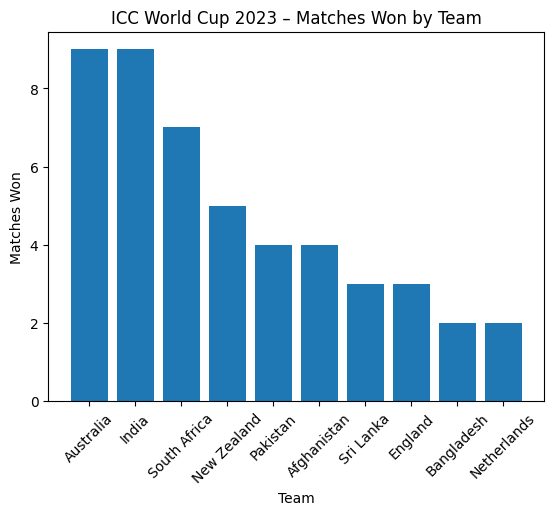

In [33]:
  plt.bar(wins.index, wins.values)
plt.xlabel("Team")
plt.ylabel("Matches Won")
plt.title("ICC World Cup 2023 – Matches Won by Team")
plt.xticks(rotation=45)
plt.show()


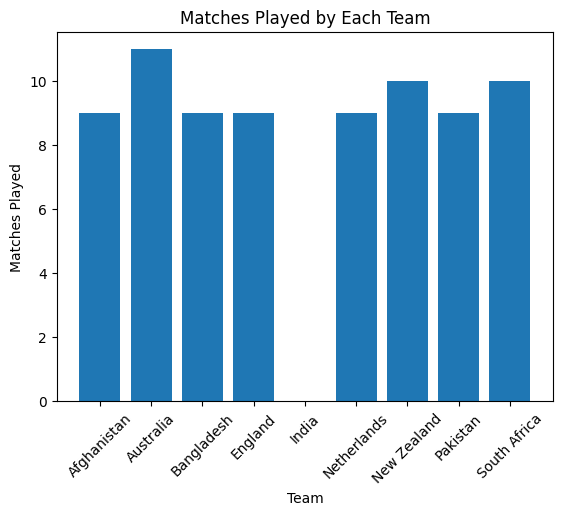

In [34]:
plt.bar(matches_played.index, matches_played.values)
plt.xlabel("Team")
plt.ylabel("Matches Played")
plt.title("Matches Played by Each Team")
plt.xticks(rotation=45)
plt.show()


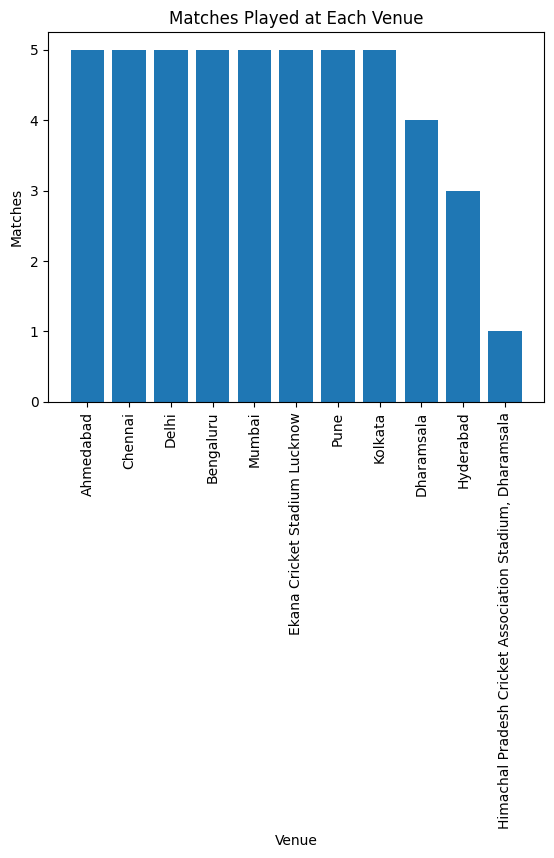

In [35]:
plt.bar(venues.index, venues.values)
plt.xlabel("Venue")
plt.ylabel("Matches")
plt.title("Matches Played at Each Venue")
plt.xticks(rotation=90)
plt.show()


In [39]:
bowling = pd.read_csv("Project 5: ICC Cricket World Cup 2023 Analysis/bowling_summary.csv")
bowling.head()

,Match_no,Match_Between,Bowling_Team,Bowler_Name,Overs,Maidens,Runs,Wickets,Economy
0,1,England vs New Zealand,New Zealand,Trent Boult,10.0,1,48,1,4.8
1,1,England vs New Zealand,New Zealand,Matt Henry,10.0,1,48,3,4.8
2,1,England vs New Zealand,New Zealand,Mitchell Santner,10.0,0,37,2,3.7
3,1,England vs New Zealand,New Zealand,Jimmy Neesham,7.0,0,56,0,8.0
4,1,England vs New Zealand,New Zealand,Rachin Ravindra,10.0,0,76,1,7.6


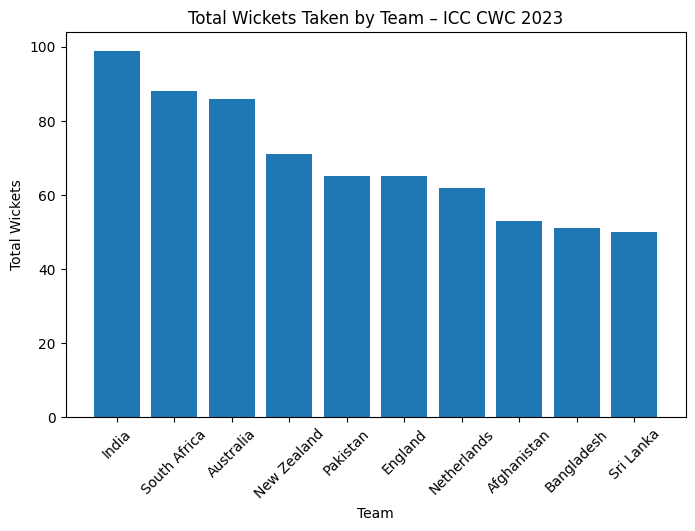

In [41]:
team_wickets = bowling.groupby('Bowling_Team')['Wickets'].sum().sort_values(ascending=False)

plt.figure(figsize=(8,5))
plt.bar(team_wickets.index, team_wickets.values)
plt.title("Total Wickets Taken by Team – ICC CWC 2023")
plt.xlabel("Team")
plt.ylabel("Total Wickets")
plt.xticks(rotation=45)
plt.show()

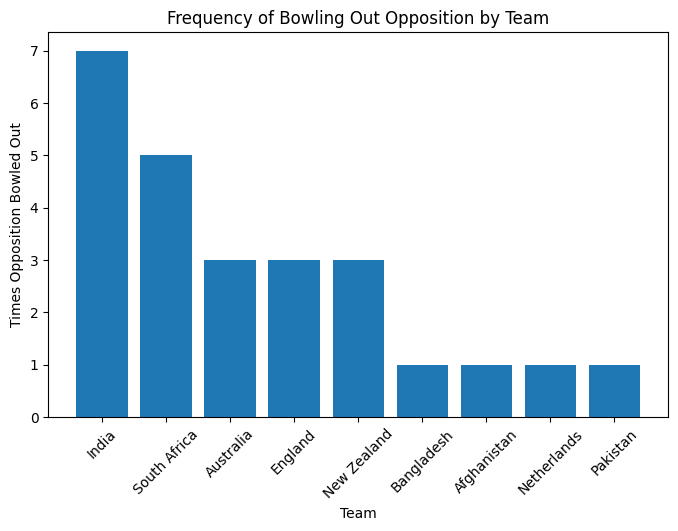

In [43]:
team_wickets_per_match = bowling.groupby(['Match_no', 'Bowling_Team'])['Wickets'].sum().reset_index()
bowled_out_matches = team_wickets_per_match[team_wickets_per_match['Wickets'] == 10]
bowled_out_count = bowled_out_matches['Bowling_Team'].value_counts()

plt.figure(figsize=(8,5))
plt.bar(bowled_out_count.index, bowled_out_count.values)
plt.title("Frequency of Bowling Out Opposition by Team")
plt.xlabel("Team")
plt.ylabel("Times Opposition Bowled Out")
plt.xticks(rotation=45)
plt.show()

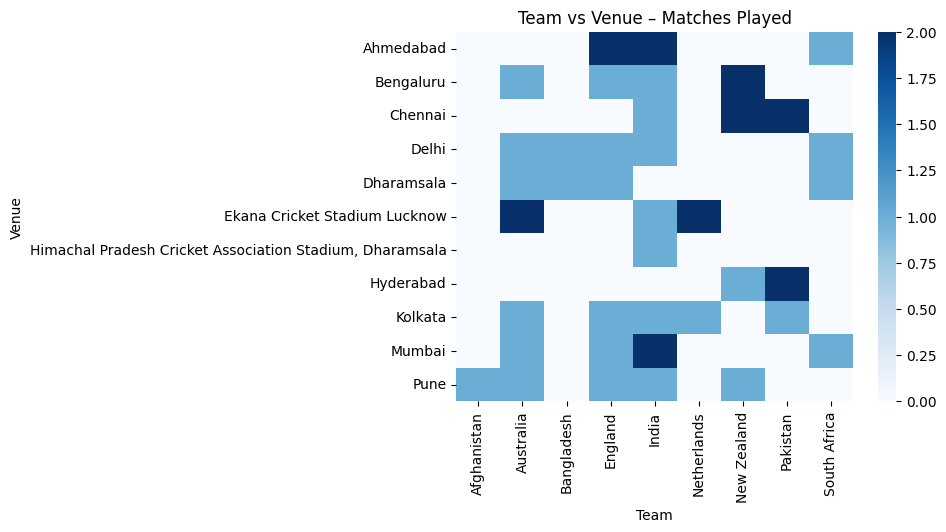

In [46]:
team_venue = (
    matches.groupby(['Venue', 'Team1'])
    .size()
    .unstack(fill_value=0)
)

sns.heatmap(team_venue, cmap="Blues")
plt.title("Team vs Venue – Matches Played")
plt.xlabel("Team")
plt.ylabel("Venue")
plt.show()

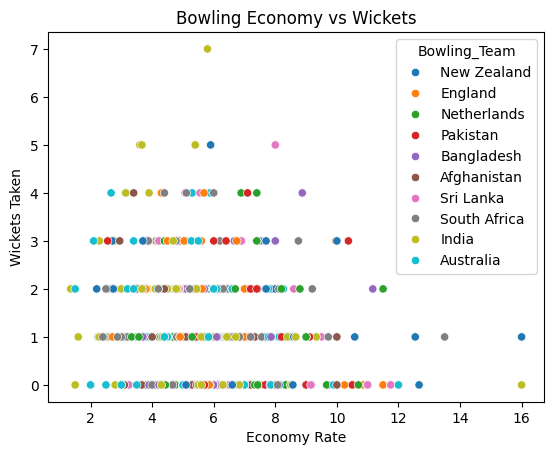

In [48]:
sns.scatterplot(
    data=bowling,
    x='Economy',
    y='Wickets',
    hue='Bowling_Team'
)
plt.title("Bowling Economy vs Wickets")
plt.xlabel("Economy Rate")
plt.ylabel("Wickets Taken")
plt.show()